In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
# from tensorflow import keras

# from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
from matplotlib.pyplot import figure
# from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Use scikit-learn to grid search the dropout rate
import numpy
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
import time #helper libraries

# file is downloaded from finance.yahoo.com, 1.1.1997-1.1.2017
# training data = 1.1.1997 - 1.1.2007
# test data = 1.1.2007 - 1.1.2017
# input_file="DIS.csv"

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(5)

# load the dataset
# df = read_csv(input_file, header=None, index_col=None, delimiter=',')

# take close price column[5]


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

#  data=pd.read_csv("stress.csv")
# data=data.to_numpy()
# data=np.genfromtxt('stress.csv',delimiter=',') # use this command to retrieve data in numpy form
# data=np.genfromtxt('stress.csv',delimiter=',')

# data=np.genfromtxt('/content/drive/My Drive/Colab Notebooks/final_basant.csv',delimiter=',')

# data=np.genfromtxt('/content/drive/My Drive/Colab Notebooks/stress.csv',delimiter=',')

data=np.genfromtxt('/content/drive/My Drive/Colab Notebooks/neighboured20.csv',delimiter=',')

data=data.T

In [ ]:
# data=np.genfromtxt('/content/Averaged_Non_zero_Data.csv',delimiter=',')


In [ ]:
# from keras.models import Sequential
# !pip install keras==2.2.4


In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.shape

(331, 5001)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,NaN,0.000000,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,...,460.000000,461.000000,462.000000,463.000000,464.000000,465.000000,466.000000,467.000000,468.000000,469.000000,470.000000,471.000000,472.000000,473.000000,474.000000,475.000000,476.000000,477.000000,478.000000,479.000000,480.0000,481.000000,482.0000,483.000000,484.00000,485.000000,486.000000,487.000000,488.000000,489.000000,490.000000,491.000000,492.000000,493.000000,494.000000,495.000000,496.000000,497.000000,498.000000,499.000000
1,NaN,0.000000,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,...,460.000000,461.000000,462.000000,463.000000,464.000000,465.000000,466.000000,467.000000,468.000000,469.000000,470.000000,471.000000,472.000000,473.000000,474.000000,475.000000,476.000000,477.000000,478.000000,479.000000,480.0000,481.000000,482.0000,483.000000,484.00000,485.000000,486.000000,487.000000,488.000000,489.000000,490.000000,491.000000,492.000000,493.000000,494.000000,495.000000,496.000000,497.000000,498.000000,499.000000
2,0.0,15.512500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1327.124653,3460.654354,2799.504491,1464.795237,3874.318525,3735.107063,6428.772738,5738.484750,3545.973112,3958.477925,5447.330363,5607.649210,7230.971450,2139.523413,2804.552664,617.849958,1016.926755,1755.986187,1765.728455,1152.234175,4147.6575,1944.245038,1041.2186,3850.935577,2788.86405,2306.294658,2392.778764,4163.197337,4811.098075,4203.179450,2304.026562,4009.389825,3050.131456,6196.644014,4103.939078,7721.592438,3487.135224,4324.363812,1610.261088,1295.636853
3,1.0,28.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,185.602875,24.824500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,686.675000,60.517625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2.0,20.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,22.628333,0.000000,0.000000,477.050000,282.881667,596.383333,94.228333,0.000000,0.000000,2458.359667,1483.725333,87.000000,124.286000,262.805783,139.210000,0.000000,968.798167,2230.813333,0.0000,1542.088133,8164.7652,2008.675658,785.23055,1.217750,0.000000,56.838333,5893.421667,1278.298833,24.038683,191.567412,329.088300,3582.966667,1203.936500,1039.513333,1730.358333,2203.250700,911.856833,1978.318333


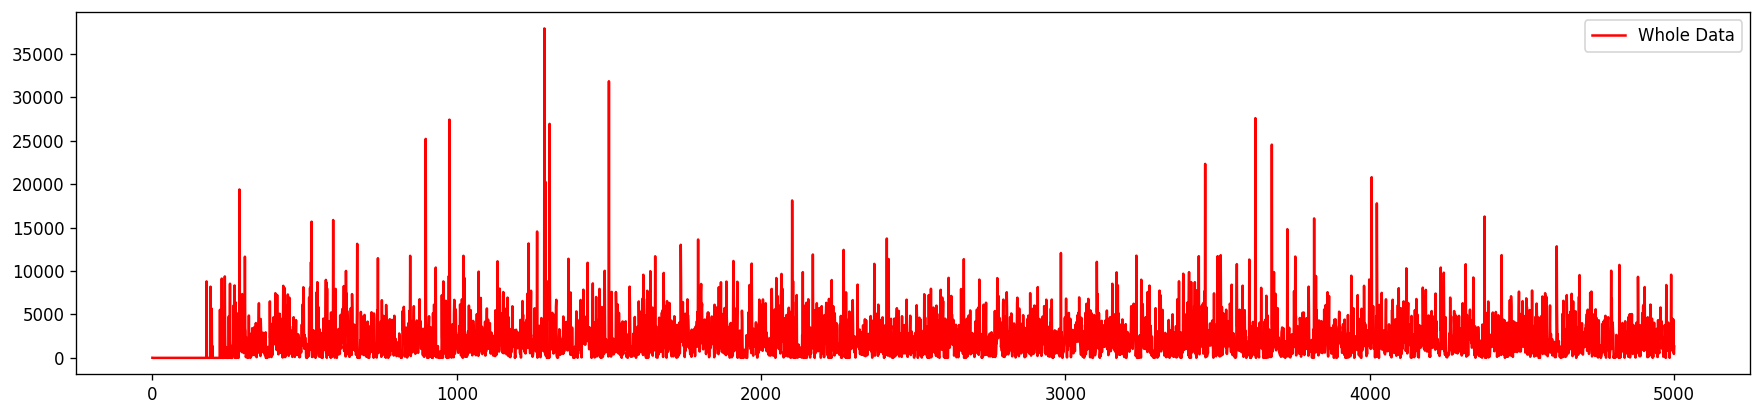

In [ ]:
# plot baseline and predictions
figure(num=None, figsize=(18, 4), dpi=120, facecolor='w', edgecolor='k')
f=13
plt.plot((data[f]),color='r',label="Whole Data")
# plt.show()
# plt.plot(trainPredictPlot,color='g',label="Train")
# # print('testPrices:')
# testPrices=scaler.inverse_transform(dataset[test_size+look_back:])


# plt.plot(testPredictPlot, label="test")
plt.legend()
# plt.title('colab file'+str(f))
plt.show()



In [ ]:
# k=2000
f=170
epoch=100
all_y = data[f]
dataset=all_y.reshape(-1, 1)
print(f)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.8)
k=int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1, timestep 240
look_back = 150
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
# model = Sequential()
# model.add(LSTM(50 , activation='relu', input_shape=(1, look_back), return_sequences=True))

# # model.add(LSTM(120, return_sequences=True))
# # model.add(LSTM(100, activation='relu', return_sequences=True))
# # model.add(LSTM(50), return_sequences=True)
# model.add(Dropout(0.1))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')
# model.fit(trainX, trainY, epochs=epoch, batch_size=240, verbose=0)

# model.add(LSTM(150 , activation='relu', input_shape=(3, look_back)  ))
# model.add(LSTM(50))
# model.add(Dropout(0.5))
# model.add(Dense(1))

# model.add(LSTM(80, activation='tanh', return_sequences=True,input_shape=(1, look_back)))

# # model.add(LSTM(32, return_sequences=True, stateful=True,
# #                batch_input_shape=(10, 1, look_back)))

# model.add(LSTM(50,return_sequences=True))
# model.add(LSTM(50, activation='relu'))
# model.add(Dropout(0.7))
# # model.add(LSTM(10))
# model.add(Dense(1))

# model.compile(loss='mse', optimizer='adam')

model = Sequential()
# model.add(LSTM(50 , activation='relu', input_shape=(1, look_back), return_sequences=True))
model = Sequential()
model.add(LSTM(60, input_shape=(1, look_back)))
model.add(Dropout(0.12))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])



model.fit(trainX, trainY, epochs=epoch, batch_size=60, verbose=0)


# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# testPredictPlot.reshape(-1, 1)
# df[str(f)]=list(testPredictPlot)
# df1[str(f)]=list(data[f])



13




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train Score: 1446.70 RMSE
Test Score: 2336.62 RMSE


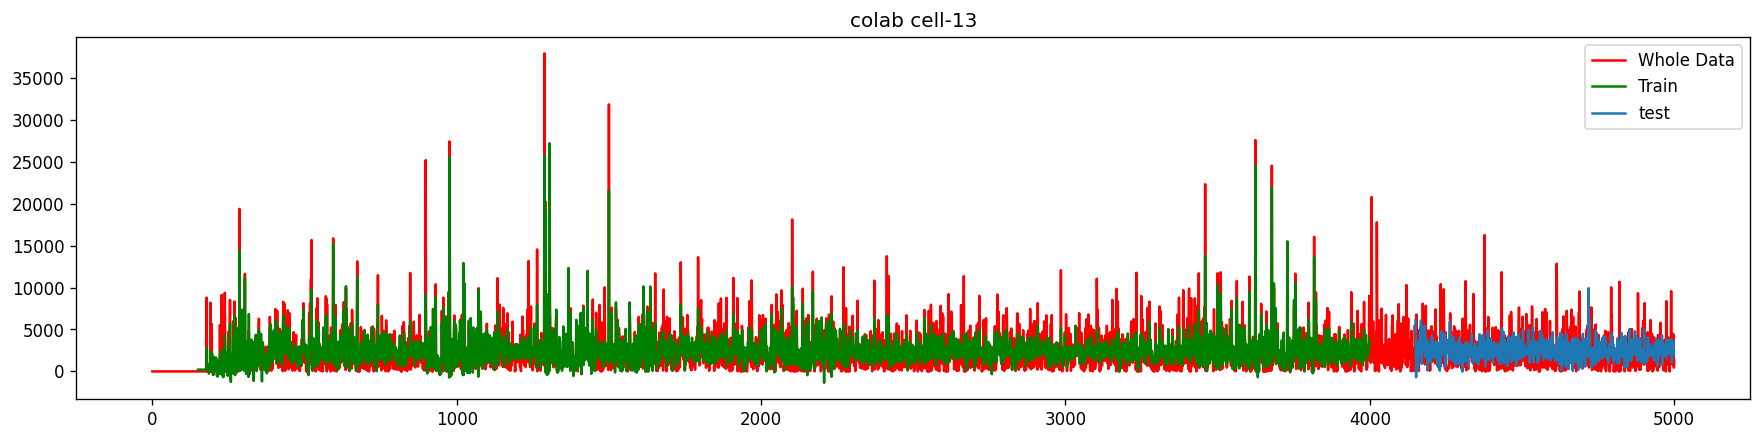

In [ ]:

# plot baseline and predictions
figure(num=None, figsize=(18, 4), dpi=120, facecolor='w', edgecolor='k')

plt.plot((data[f]),color='r',label="Whole Data")
# plt.show()
plt.plot(trainPredictPlot,color='g',label="Train")
# print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])


plt.plot(testPredictPlot, label="test")
plt.legend()
plt.title('colab cell-'+str(f))
plt.show()




In [ ]:
f=13
epoch=100
# for f in range(189,2417):
all_y = data[f]
dataset=all_y.reshape(-1, 1)
print(f)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.8)
k=int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1, timestep 240
look_back = 180
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
look_back=180

13


Batch Size Optimization



In [ ]:
# look_back=190
epoch=130
def create_model():
	# create model
  model = Sequential()
  model.add(LSTM(60, input_shape=(1, look_back)))
  model.add(Dropout(0.12))
  model.add(Dense(1))
  # model.compile(loss='mse', optimizer='adam')
  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [25,30,45,60, 80, 100,130,150]

epochs = [epoch]

param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(trainX, trainY)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.000524 using {'batch_size': 25, 'epochs': 130}
0.000524 (0.000370) with: {'batch_size': 25, 'epochs': 130}
0.000262 (0.000370) with: {'batch_size': 30, 'epochs': 130}
0.000000 (0.000000) with: {'batch_size': 45, 'epochs': 130}
0.000000 (0.000000) with: {'batch_size': 60, 'epochs': 130}
0.000262 (0.000370) with: {'batch_size': 80, 'epochs': 130}
0.000262 (0.000370) with: {'batch_size': 100, 'epochs': 130}
0.000262 (0.000370) with: {'batch_size': 130, 'epochs': 130}
0.000000 (0.000000) with: {'batch_size': 150, 'epochs': 130}


Dropout Optimization

In [ ]:
epoch=130
def create_model():
	# create model
  model = Sequential()
  model.add(LSTM(60, input_shape=(1, look_back)))
  model.add(Dropout(0.12))
  model.add(Dense(1))
  # model.compile(loss='mse', optimizer='adam')
  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [30,45,60, 80, 100,130,150,180,240,270]
epochs = [epoch]

param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(trainX, trainY)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Look_back Optimization


In [ ]:
epoch=130
def create_model(look_up=130):
	# create model
  model = Sequential()
  model.add(LSTM(40, input_shape=(1, look_up)))
  model.add(Dropout(0.12))
  model.add(Dense(1))
  # model.compile(loss='mse', optimizer='adam')
  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
look_up=[70,90,110,130,150,170,190,210,230]
epochs = [epoch]
batch_size=[25]
param_grid = dict(look_up=look_up, epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(trainX, trainY)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


ValueError: ignored

Neuron Optimization

In [ ]:
epoch=130
def create_model(neurons=30):
	# create model
  model = Sequential()
  model.add(LSTM(neurons, input_shape=(1, look_back)))
  model.add(Dropout(0.12))
  model.add(Dense(1))
  # model.compile(loss='mse', optimizer='adam')
  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
neurons = [20, 25, 35,45,55,70]
epochs = [epoch]
batch_size = [25]

param_grid = dict(neurons=neurons, epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(trainX, trainY)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.001833 using {'batch_size': 25, 'epochs': 130, 'neurons': 20}
0.001833 (0.000980) with: {'batch_size': 25, 'epochs': 130, 'neurons': 20}
0.000262 (0.000370) with: {'batch_size': 25, 'epochs': 130, 'neurons': 25}
0.000262 (0.000370) with: {'batch_size': 25, 'epochs': 130, 'neurons': 35}
0.000000 (0.000000) with: {'batch_size': 25, 'epochs': 130, 'neurons': 45}
0.001309 (0.001852) with: {'batch_size': 25, 'epochs': 130, 'neurons': 55}
0.000262 (0.000370) with: {'batch_size': 25, 'epochs': 130, 'neurons': 70}


All Parameters at Once

In [ ]:
epoch=130
def create_model(dropout_rate=0.1,neurons=25,batch_size=20,look_up=130):
	# create model
  model = Sequential()
  model.add(LSTM(neurons, input_shape=(1, look_back)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1))
  # model.compile(loss='mse', optimizer='adam')
  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [25,30,45,60, 80, 100,130]
dropout = [0.0,0.06, 0.08, 0.1,0.12,0.14,0.16,0.18, 0.2,0.25, 0.3, 0.4]
neurons = [20, 25, 35,45,55,70]
look_up=[50,70,90,110,130,150,170,190,210,230]
epochs = [130]

# batch_size = [25,30]
# dropout_rate = [0.0, 0.1]
# neurons = [20,40]
# look_up=[50,60]
# epochs = [1]


param_grid = dict(batch_size=batch_size, epochs=epochs,dropout_rate=dropout_rate, neurons=neurons,look_up=look_up)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(trainX, trainY)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:

# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0):
	# create model
	
  model = Sequential()
  model.add(LSTM(60, input_shape=(1, look_back)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1))
  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, epochs=epoch, batch_size=30, verbose=0)
# define the grid search parameters
dropout_rate = [0.0, 0.1,0.12,0.14,0.16,0.18, 0.2,0.25, 0.3, 0.4, 0.5]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(trainX, trainY)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
# from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
	# create model
  model = Sequential()
  model.add(LSTM(neurons, input_shape=(1, look_back)))
  model.add(Dropout(0.7))
  model.add(Dense(1))
  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  return model
# fix random seed for reproducibility
# seed = 7
# numpy.random.seed(seed)
# # load dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=240, verbose=0)
# define the grid search parameters
neurons = [20, 25, 35,45,55,70]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(trainX, trainY)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.000886 using {'neurons': 25}
0.000380 (0.000310) with: {'neurons': 20}
0.000886 (0.001253) with: {'neurons': 25}
0.000127 (0.000179) with: {'neurons': 35}
0.000000 (0.000000) with: {'neurons': 45}
0.000127 (0.000179) with: {'neurons': 55}
0.000000 (0.000000) with: {'neurons': 70}


In [ ]:
testScore

5557.32400930795

In [ ]:
trainScore

4073.4197630015556

In [ ]:
# k=2000
f=736
epoch=150
all_y = data[f]
dataset=all_y.reshape(-1, 1)
print(f)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.8)
k=int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1, timestep 240
look_back = 350
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Use scikit-learn to grid search the activation function
import numpy
from sklearn.model_selection import GridSearchCV
# from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	# model = Sequential()
	# model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation=activation))
	# model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# # Compile model
	# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# return model
  model = Sequential()
  model.add(LSTM(25, input_shape=(1, look_back), activation=activation))
  model.add(Dropout(0.7))
  model.add(Dense(1))
  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=240, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(trainX, trainY)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))





736


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.001569 using {'activation': 'tanh'}
0.000000 (0.000000) with: {'activation': 'softmax'}
0.000000 (0.000000) with: {'activation': 'softplus'}
0.000131 (0.000185) with: {'activation': 'softsign'}
0.000000 (0.000000) with: {'activation': 'relu'}
0.001569 (0.002219) with: {'activation': 'tanh'}
0.000262 (0.000370) with: {'activation': 'sigmoid'}
0.000262 (0.000370) with: {'activation': 'hard_sigmoid'}
0.000000 (0.000000) with: {'activation': 'linear'}


In [ ]:
trainX.shape

(7649, 1, 350)

In [ ]:
trainY.shape

(1, 7649)

In [ ]:
type(trainPredict)

numpy.ndarray

In [ ]:
trainScore

398.41379905139075

In [ ]:
testScore

2935.0959073390295

In [ ]:
testY.shape

(1, 1649)

In [ ]:
trainX.shape

(7649, 1, 350)

In [ ]:
testPredict

array([[ 735.1216 ],
       [1569.1564 ],
       [1394.3575 ],
       ...,
       [ 350.16782],
       [ 762.1287 ],
       [1435.8369 ]], dtype=float32)

In [ ]:
trainX.shape

(7649, 1, 350)

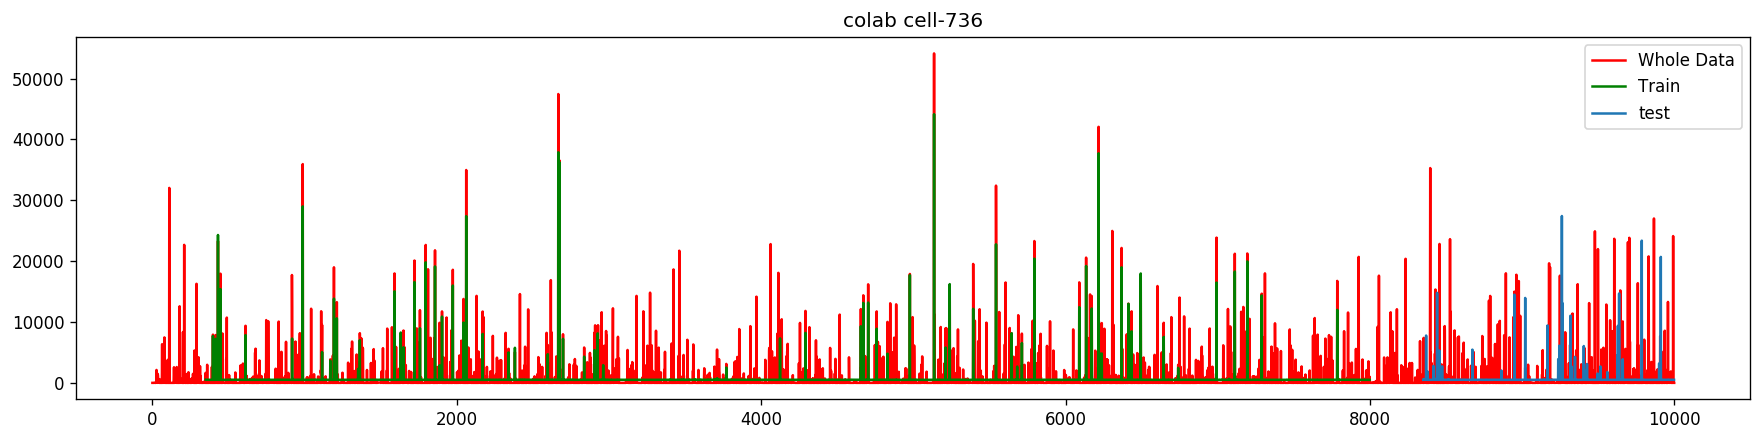

In [ ]:

# plot baseline and predictions
figure(num=None, figsize=(18, 4), dpi=120, facecolor='w', edgecolor='k')

plt.plot((data[f]),color='r',label="Whole Data")
# plt.show()
plt.plot(trainPredictPlot,color='g',label="Train")
# print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])


plt.plot(testPredictPlot, label="test")
plt.legend()
plt.title('colab cell-'+str(f))
plt.show()




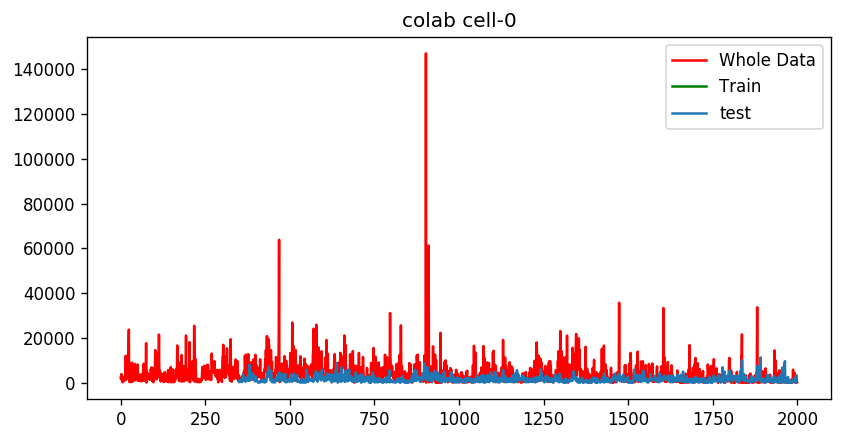

In [ ]:

# plot baseline and predictions
figure(num=None, figsize=(8, 4), dpi=120, facecolor='w', edgecolor='k')

plt.plot((data[f][k:]),color='r',label="Whole Data")
# plt.show()
plt.plot(trainPredictPlot[k:],color='g',label="Train")
# print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])


plt.plot(testPredictPlot[k:], label="test")
plt.legend()
plt.title('colab cell-'+str(f))
plt.show()


